# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
from pprint import pprint
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

In [3]:
cities

['mar del plata',
 'taolanaro',
 'chuy',
 'tamboril',
 'rikitea',
 'attawapiskat',
 'whitehorse',
 'busselton',
 'saskylakh',
 'vaini',
 'durusu',
 'san patricio',
 'skibbereen',
 'upernavik',
 'mahebourg',
 'majene',
 'barentsburg',
 'bluff',
 'arlit',
 'gazanjyk',
 'ushuaia',
 'kaitangata',
 'lebu',
 'korla',
 'east london',
 'tual',
 'port elizabeth',
 'lompoc',
 'yellowknife',
 'hilo',
 'coquimbo',
 'nanortalik',
 'cidreira',
 'cape town',
 'butaritari',
 'vanderhoof',
 'coahuayana',
 'kaele',
 'bathsheba',
 'nuuk',
 'carnarvon',
 'fort-shevchenko',
 'menongue',
 'atuona',
 'nizhneudinsk',
 'illoqqortoormiut',
 'tazovskiy',
 'hasaki',
 'vila velha',
 'buraydah',
 'asau',
 'timbakion',
 'thompson',
 'kavaratti',
 'nabire',
 'canon city',
 'burica',
 'nishihara',
 'sitka',
 'flin flon',
 'bengkulu',
 'provideniya',
 'iqaluit',
 'husavik',
 'georgetown',
 'ancud',
 'longyearbyen',
 'barrow',
 'port augusta',
 'codrington',
 'mataura',
 'new norfolk',
 'ponta do sol',
 'cayenne',
 'lab

In [4]:
cities_pd = pd.DataFrame(cities)
cities_pd = cities_pd.rename(columns={0: "City"})
cities_pd["Latitude"] = ""
cities_pd["Longitude"] = ""
cities_pd["Max Temperature"] = ""
cities_pd["Humidity"] = ""
cities_pd["Cloudiness"] = ""
cities_pd["Wind Speed"] = ""
cities_pd["Country"] = ""
cities_pd["Date"] = ""
cities_pd.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,mar del plata,,,,,,,,
1,taolanaro,,,,,,,,
2,chuy,,,,,,,,
3,tamboril,,,,,,,,
4,rikitea,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [5]:
# Performing the API calls and printing the log all at once:
# city_index = 0

units = "imperial"
url = "http://api.openweathermap.org/data/2.5/weather?"

print("----------------------------------------")
print("Beginning Data Retrieval:")
print("----------------------------------------")

# Creating lists to store the city/location, temp, etc:
location = []
lat = []
long = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

city_num = 1
city_set = 1

for city in cities:
    q_url = f"{url}&appid={weather_api_key}&q={city}&units={units}"
    temp_response = requests.get(q_url).json()
    
    print(f"Processing records: {city_num} of Set {city_set} | {city}")

    try:
        city_num += 1
        location.append(temp_response['name'])        
        lat.append(temp_response['coord']['lat'])
        long.append(temp_response['coord']['lon'])
        max_temp.append(temp_response['main']['temp'])
        humidity.append(temp_response['main']['humidity'])
        cloudiness.append(temp_response['clouds']['all'])
        wind_speed.append(temp_response['wind']['speed'])
        country.append(temp_response['sys']['country'])
        date.append(temp_response['dt'])
        
    except (KeyError, IndexError):
        print("City not found. Resuming...")
        pass
    
    if city_num == 51:
        city_set += 1
        city_num = 1
        
print("---------------------------------------")
print("Data Retrieval Complete")
print("---------------------------------------")

----------------------------------------
Beginning Data Retrieval:
----------------------------------------
Processing records: 1 of Set 1 | mar del plata
Processing records: 2 of Set 1 | taolanaro
City not found. Resuming...
Processing records: 3 of Set 1 | chuy
Processing records: 4 of Set 1 | tamboril
Processing records: 5 of Set 1 | rikitea
Processing records: 6 of Set 1 | attawapiskat
City not found. Resuming...
Processing records: 7 of Set 1 | whitehorse
Processing records: 8 of Set 1 | busselton
Processing records: 9 of Set 1 | saskylakh
Processing records: 10 of Set 1 | vaini
Processing records: 11 of Set 1 | durusu
Processing records: 12 of Set 1 | san patricio
Processing records: 13 of Set 1 | skibbereen
Processing records: 14 of Set 1 | upernavik
Processing records: 15 of Set 1 | mahebourg
Processing records: 16 of Set 1 | majene
Processing records: 17 of Set 1 | barentsburg
City not found. Resuming...
Processing records: 18 of Set 1 | bluff
Processing records: 19 of Set 1 |

Processing records: 25 of Set 4 | valdosta
Processing records: 26 of Set 4 | pangnirtung
Processing records: 27 of Set 4 | brae
Processing records: 28 of Set 4 | pietermaritzburg
Processing records: 29 of Set 4 | kavieng
Processing records: 30 of Set 4 | saleaula
City not found. Resuming...
Processing records: 31 of Set 4 | hobyo
Processing records: 32 of Set 4 | praia da vitoria
Processing records: 33 of Set 4 | awjilah
Processing records: 34 of Set 4 | vostok
Processing records: 35 of Set 4 | san ignacio
Processing records: 36 of Set 4 | jamestown
Processing records: 37 of Set 4 | wuwei
Processing records: 38 of Set 4 | amderma
City not found. Resuming...
Processing records: 39 of Set 4 | barra patuca
Processing records: 40 of Set 4 | atbasar
Processing records: 41 of Set 4 | oranjemund
Processing records: 42 of Set 4 | sibolga
Processing records: 43 of Set 4 | pemba
Processing records: 44 of Set 4 | karratha
Processing records: 45 of Set 4 | zhigansk
Processing records: 46 of Set 4 

Processing records: 1 of Set 8 | norman wells
Processing records: 2 of Set 8 | birao
Processing records: 3 of Set 8 | sao francisco
Processing records: 4 of Set 8 | kodiak
Processing records: 5 of Set 8 | vaitape
Processing records: 6 of Set 8 | limulunga
Processing records: 7 of Set 8 | vestmannaeyjar
Processing records: 8 of Set 8 | wewak
Processing records: 9 of Set 8 | samba
Processing records: 10 of Set 8 | severodvinsk
Processing records: 11 of Set 8 | tiznit
Processing records: 12 of Set 8 | nelson bay
Processing records: 13 of Set 8 | ukiah
Processing records: 14 of Set 8 | kiruna
Processing records: 15 of Set 8 | hambantota
Processing records: 16 of Set 8 | kutum
Processing records: 17 of Set 8 | pathein
Processing records: 18 of Set 8 | kudahuvadhoo
Processing records: 19 of Set 8 | antipovka
Processing records: 20 of Set 8 | boone
Processing records: 21 of Set 8 | rosario do sul
Processing records: 22 of Set 8 | porterville
Processing records: 23 of Set 8 | lolua
City not fo

Processing records: 32 of Set 11 | hendrina
Processing records: 33 of Set 11 | ericeira
Processing records: 34 of Set 11 | sorland
Processing records: 35 of Set 11 | dwarka
Processing records: 36 of Set 11 | do gonbadan
Processing records: 37 of Set 11 | ailigandi
Processing records: 38 of Set 11 | port-gentil
Processing records: 39 of Set 11 | krasnyy chikoy
Processing records: 40 of Set 11 | sakhon nakhon
Processing records: 41 of Set 11 | bonthe
Processing records: 42 of Set 11 | acajutla
Processing records: 43 of Set 11 | altay
Processing records: 44 of Set 11 | kurchum
Processing records: 45 of Set 11 | canakkale
Processing records: 46 of Set 11 | bur gabo
City not found. Resuming...
Processing records: 47 of Set 11 | tuatapere
Processing records: 48 of Set 11 | bourail
Processing records: 49 of Set 11 | salihorsk
Processing records: 50 of Set 11 | pangoa
Processing records: 1 of Set 12 | sabang
Processing records: 2 of Set 12 | rameshki
Processing records: 3 of Set 12 | kapuskasi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
cities_pd.count()

City               613
Latitude           613
Longitude          613
Max Temperature    613
Humidity           613
Cloudiness         613
Wind Speed         613
Country            613
Date               613
dtype: int64

In [7]:
# Displaying the DataFrame:
cities_pd = pd.DataFrame({
    "City": location,
    "Latitude": lat,
    "Longitude": long,
    "Max Temperature": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
})

cities_pd.head(10)

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mar del Plata,-38.00,-57.56,48.83,93,100,17.22,AR,1594406686
1,Chui,-33.70,-53.46,56.14,75,100,7.83,UY,1594406882
2,Tamboril,19.49,-70.61,91.33,44,40,6.93,DO,1594406883
3,Rikitea,-23.12,-134.97,67.48,65,100,19.39,PF,1594406696
4,Whitehorse,60.72,-135.05,57.54,58,75,9.17,CA,1594406883
5,Busselton,-33.65,115.33,38.73,76,0,12.10,AU,1594406632
6,Saskylakh,71.92,114.08,53.20,68,100,16.08,RU,1594406688
7,Vaini,-21.20,-175.20,69.80,88,20,10.29,TO,1594406884
8,Durusu,41.31,28.68,75.47,64,40,20.80,TR,1594406884
9,San Patricio,19.22,-104.70,89.60,70,75,11.41,MX,1594406706


In [8]:
# Converting the city data into a 'csv' file:
# Output File (CSV)
cities_output = cities_pd.to_csv('../OutputData/cities.csv', index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
# Find the cities with humidity that is over 100%:

humidity_over100 = cities_pd.sort_values('Humidity', ascending=False)
humidity_over100

#This shows that this particular collection of cities does not have humidity over 100%:

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
279,Isangel,-19.55,169.27,64.40,100,40,3.36,VU,1594406743
446,Wagga Wagga,-35.12,147.37,45.79,100,40,5.82,AU,1594406712
418,Hachinohe,40.50,141.50,66.20,100,90,4.70,JP,1594406993
391,Bintulu,3.17,113.03,73.20,100,40,4.70,MY,1594406985
535,Eureka,40.80,-124.16,64.49,100,13,3.00,US,1594406791
...,...,...,...,...,...,...,...,...,...
463,Agadez,19.75,10.25,94.57,11,0,6.89,NE,1594406739
145,Bayreuth,49.95,11.58,67.82,10,88,5.66,DE,1594406920
107,Saint George,37.10,-113.58,95.27,9,1,3.36,US,1594406911
284,Meadow Lake,34.80,-106.54,96.33,9,75,4.70,US,1594406958


In [10]:
#  Get the indices of cities that have humidity over 100%.
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# Extract relevant fields from the data frame
# Export the City_Data into a csv

# ^^^ No humidity (%) found over 100; therefore, skipping this portion ^^^

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

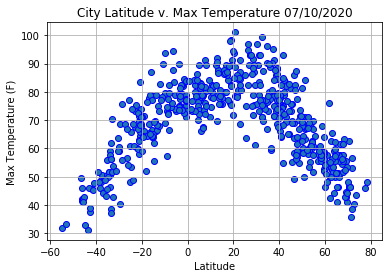

In [11]:
# Plotting 'Latitude v. Max Temperature':
x = cities_pd['Latitude']
y = cities_pd['Max Temperature']
plt.scatter(x, y, edgecolor='b')
plt.title("City Latitude v. Max Temperature 07/10/2020")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig('../OutputData/Fig1.png')
plt.show()

* This plot, 'City Latitude v. Max Temperature', illustrates that the temperatures are higher in the cities closer to the Equator. Therefore, the temperatures lower in the cities closer to the North and South poles. In this plot, there is a city with the highest temperature at about 20 degrees North of the equator.

## Latitude vs. Humidity Plot

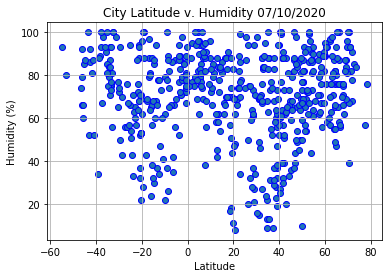

In [12]:
# Plotting latitude v. humidity:
x = cities_pd['Latitude']
y = cities_pd['Humidity']
plt.scatter(x, y, edgecolor='b')
plt.title("City Latitude v. Humidity 07/10/2020")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig('../OutputData/Fig2.png')
plt.show()

* This plot, 'City Latitude v. Humidity', illustrates that the humidity can range anywhere from about 3-100% in cities between 20 and 50 deegrees North. Meanwhile, at the Equator (and regions close by) are usually high in humidity ranging from 50-100%.

## Latitude vs. Cloudiness Plot

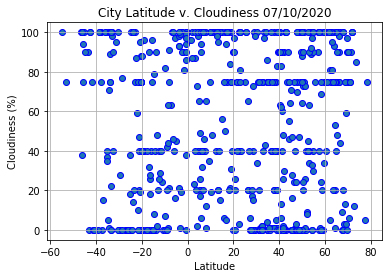

In [13]:
# Plotting latitude v. cloudiness:
x = cities_pd['Latitude']
y = cities_pd['Cloudiness']
plt.scatter(x, y, edgecolor='b')
plt.title("City Latitude v. Cloudiness 07/10/2020")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig('../OutputData/Fig3.png')
plt.show()

* This plot, 'City Latitude v. Cloudiness', illustrates that cloudiness is all over the place no matter where in the world you may be. Digging deeper, several cities closest to the Equator are mostly at 100% cloudiness meaning they have very cloudy skies. Meanwhile, the several cities between -10 to -45 degrees South as well as 25 to 70 degrees North have clear skies on this date.

## Latitude vs. Wind Speed Plot

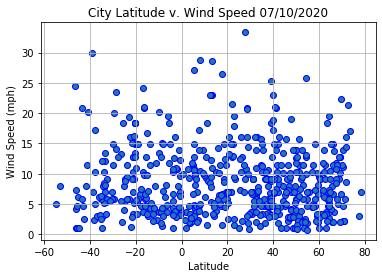

In [14]:
# Plotting latitude v. wind_speed:
x = cities_pd['Latitude']
y = cities_pd['Wind Speed']
plt.scatter(x, y, edgecolor='b')
plt.title("City Latitude v. Wind Speed 07/10/2020")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig('../OutputData/Fig4.png')
plt.show()

* This plot, 'City Latitude v. Wind Speed', illustrates that the highest wind speeds are in a city near 30 degrees North on this date. 

## Linear Regression

In [15]:
# Create Northern and Southern Hemisphere DataFrame

# Northern Hemisphere (on Latitude from 0 to 90 degrees):
northern_hemi = cities_pd.loc[(cities_pd['Latitude'] >= 0)]
northern_hemi

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
2,Tamboril,19.49,-70.61,91.33,44,40,6.93,DO,1594406883
4,Whitehorse,60.72,-135.05,57.54,58,75,9.17,CA,1594406883
6,Saskylakh,71.92,114.08,53.20,68,100,16.08,RU,1594406688
8,Durusu,41.31,28.68,75.47,64,40,20.80,TR,1594406884
9,San Patricio,19.22,-104.70,89.60,70,75,11.41,MX,1594406706
...,...,...,...,...,...,...,...,...,...
553,Kolpny,52.23,37.04,59.50,73,8,3.94,RU,1594407030
554,Basco,20.45,121.97,85.01,69,97,5.14,PH,1594407030
555,Swift Current,50.28,-107.80,64.40,82,90,12.75,CA,1594407030
556,Campbell River,50.02,-125.24,62.78,67,75,10.29,CA,1594407030


In [16]:
# This will show me the cities farthest and closest in the Northern Hemisphere:
north_high_to_low = northern_hemi.sort_values('Latitude', ascending=False)
north_high_to_low

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
60,Longyearbyen,78.22,15.64,48.20,76,75,6.93,SJ,1594406898
112,Qaanaaq,77.48,-69.36,46.17,57,5,3.11,GL,1594406912
233,Dikson,73.51,80.55,43.50,84,85,17.11,RU,1594406944
11,Upernavik,72.79,-56.15,40.48,85,12,21.27,GL,1594406885
221,Khatanga,71.97,102.50,56.57,78,100,14.43,RU,1594406940
...,...,...,...,...,...,...,...,...,...
330,Kudahuvadhoo,2.67,72.89,84.11,75,23,10.87,MV,1594406970
261,Kapit,2.02,112.93,73.38,95,100,1.03,MY,1594406951
171,Sibolga,1.74,98.78,76.95,77,87,3.76,ID,1594406927
503,Impfondo,1.64,18.07,73.81,88,96,2.37,CG,1594407016


In [17]:
# Southern Hemisphere (on Latitude less than 0 degrees):
southern_hemi = cities_pd.loc[(cities_pd['Latitude'] < 0)]
southern_hemi

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mar del Plata,-38.00,-57.56,48.83,93,100,17.22,AR,1594406686
1,Chui,-33.70,-53.46,56.14,75,100,7.83,UY,1594406882
3,Rikitea,-23.12,-134.97,67.48,65,100,19.39,PF,1594406696
5,Busselton,-33.65,115.33,38.73,76,0,12.10,AU,1594406632
7,Vaini,-21.20,-175.20,69.80,88,20,10.29,TO,1594406884
...,...,...,...,...,...,...,...,...,...
546,Olinda,-8.01,-34.86,82.40,74,75,14.99,BR,1594406979
550,Chokwé,-24.53,32.98,73.80,43,0,8.75,MZ,1594407029
552,Charters Towers,-20.10,146.27,59.00,96,40,5.64,AU,1594407029
557,Sorong,-0.88,131.25,76.96,89,97,6.40,ID,1594407030


In [18]:
# This will show me the cities closest and farthest in the Southern Hemisphere:
south_low_to_high = southern_hemi.sort_values('Latitude', ascending=True)
south_low_to_high

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
17,Ushuaia,-54.80,-68.30,32.00,93,100,5.10,AR,1594406887
90,Punta Arenas,-53.15,-70.92,33.39,80,75,8.05,CL,1594406690
14,Bluff,-46.60,168.33,49.42,74,100,24.47,NZ,1594406886
18,Kaitangata,-46.28,169.85,42.01,66,38,1.01,NZ,1594406701
64,Mataura,-46.19,168.86,41.23,92,100,4.21,NZ,1594406699
...,...,...,...,...,...,...,...,...,...
443,Ewo,-0.87,14.82,77.63,75,100,3.24,CG,1594406999
134,Puerto Ayora,-0.74,-90.35,71.01,86,100,7.00,EC,1594406918
488,Port-Gentil,-0.72,8.78,77.00,78,90,12.24,GA,1594407011
225,Hithadhoo,-0.60,73.08,83.79,74,94,9.57,MV,1594406941


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5576064854657233


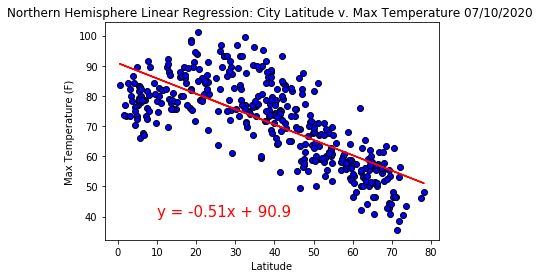

In [19]:
# Plotting linear regression for the Northern Hemisphere by 'Latitude v. Max Temperature':
x = northern_hemi['Latitude']
y = northern_hemi['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eqn = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x, y, facecolor='blue', edgecolor='black')
plt.plot(x, regress_values, "r-")
plt.annotate(line_eqn,(10,40), fontsize=15, color="r")
plt.title("Northern Hemisphere Linear Regression: City Latitude v. Max Temperature 07/10/2020 ")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('../OutputData/Fig5.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7275711015506946


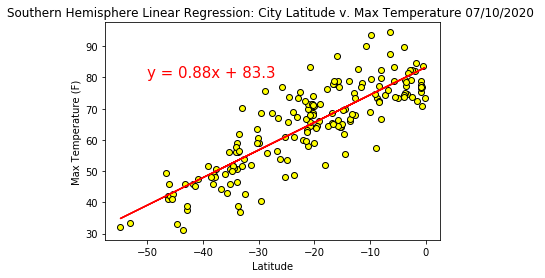

In [20]:
# Plotting linear regression for the Southern Hemisphere by 'Latitude v. Max Temperature':
x = southern_hemi['Latitude']
y = southern_hemi['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eqn = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x, y, facecolor='yellow', edgecolor='black')
plt.plot(x, regress_values, "r-")
plt.annotate(line_eqn,(-50,80), fontsize=15, color="r")
plt.title("Southern Hemisphere Linear Regression: City Latitude v. Max Temperature 07/10/2020 ")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('../OutputData/Fig6.png')
plt.show()

* Comparing the Northern and Southern Hemisphere:
    * The Northern Hemisphere has a downward trend that temperatures decrease steadily as you travel farther up North.
    * In the Southern Hemisphere, there is an upward trend that shows temperatures rise steadily as you travel closer to the Equator.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.002091551882846689


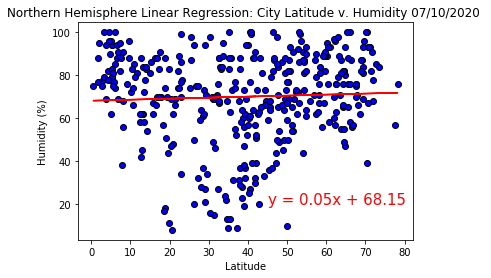

In [24]:
# Plotting linear regression for the Northern Hemisphere by 'Latitude v. Humidity':
x = northern_hemi['Latitude']
y = northern_hemi['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eqn = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x, y, facecolor='blue', edgecolor='black')
plt.plot(x, regress_values, "r-")
plt.annotate(line_eqn,(45,20), fontsize=15, color="r")
plt.title("Northern Hemisphere Linear Regression: City Latitude v. Humidity 07/10/2020 ")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('../OutputData/Fig7.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.019526341264824065


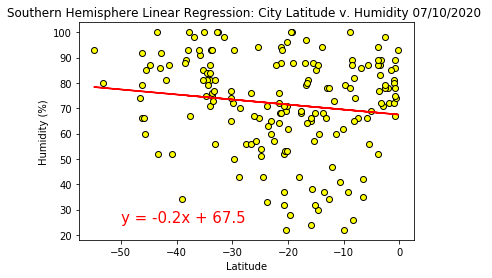

In [26]:
# Plotting linear regression for the Southern Hemisphere by 'Latitude v. Humidity':
x = southern_hemi['Latitude']
y = southern_hemi['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eqn = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x, y, facecolor='yellow', edgecolor='black')
plt.plot(x, regress_values, "r-")
plt.annotate(line_eqn,(-50,25), fontsize=15, color="r")
plt.title("Southern Hemisphere Linear Regression: City Latitude v. Humidity 07/10/2020 ")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('../OutputData/Fig8.png')
plt.show()

* Comparing the Northern and Southern Hemisphere:
    * The Northern Hemisphere has a very small, slight upward regression. The humidity is lowest amongst the cities between 20 to 50 degrees North as well as -5 to -30 degrees South.
    * In the Southern Hemisphere, there is a downward regression. The humidity in both hemispheres show a consistent relationship that the humidity is generally highest amongst the cities near the Equator.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 1.5427267088163967e-05


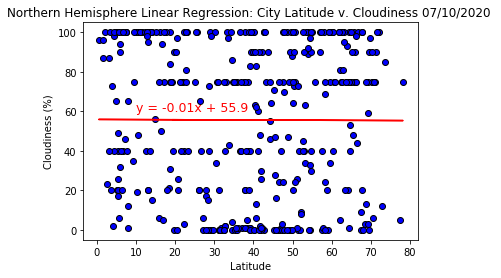

In [31]:
# Plotting linear regression for the Northern Hemisphere by 'Latitude v. Cloudiness':
x = northern_hemi['Latitude']
y = northern_hemi['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eqn = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x, y, facecolor='blue', edgecolor='black')
plt.plot(x, regress_values, "r-")
plt.annotate(line_eqn,(10,60), fontsize=12.5, color="r")
plt.title("Northern Hemisphere Linear Regression: City Latitude v. Cloudiness 07/10/2020 ")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('../OutputData/Fig9.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0004714727320187325


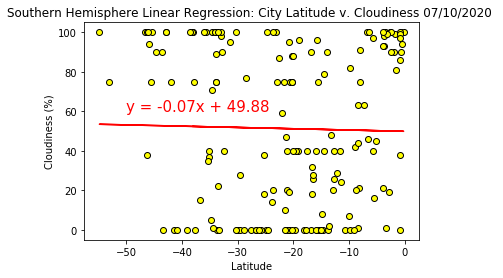

In [33]:
# Plotting linear regression for the Southern Hemisphere by 'Latitude v. Cloudiness':
x = southern_hemi['Latitude']
y = southern_hemi['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eqn = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x, y, facecolor='yellow', edgecolor='black')
plt.plot(x, regress_values, "r-")
plt.annotate(line_eqn,(-50,60), fontsize=15, color="r")
plt.title("Southern Hemisphere Linear Regression: City Latitude v. Cloudiness 07/10/2020 ")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('../OutputData/Fig10.png')
plt.show()

* Comparing the Northern and Southern Hemisphere:
    * The Northern Hemisphere the cloudiness is basically evenly dispersed across the entire hemisphere. No one particular region or accumulation of cities occurs. Looking closely, there are a higher concentration of cities that have no cloud coverage between 25-55 degrees North.
    * Simiarly, the Southern Hemisphere, the scatter points are somewhat dispersed but there seems to be a higher concentration of cloudiness amongst cities near the Equator.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.005255441075419994


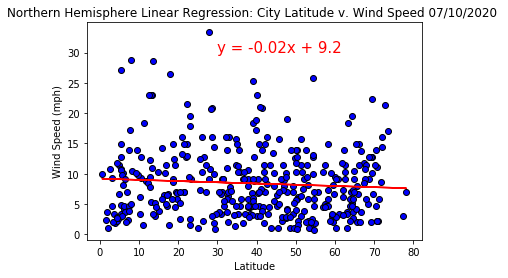

In [35]:
# Plotting linear regression for the Northern Hemisphere by 'Latitude v. Wind Speed':
x = northern_hemi['Latitude']
y = northern_hemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eqn = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x, y, facecolor='blue', edgecolor='black')
plt.plot(x, regress_values, "r-")
plt.annotate(line_eqn,(30,30), fontsize=15, color="r")
plt.title("Northern Hemisphere Linear Regression: City Latitude v. Wind Speed 07/10/2020 ")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('../OutputData/Fig11.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.00044580122540527215


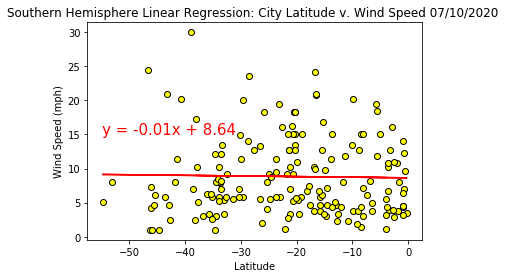

In [37]:
# Plotting linear regression for the Southern Hemisphere by 'Latitude v. Wind Speed':
x = southern_hemi['Latitude']
y = southern_hemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eqn = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x, y, facecolor='yellow', edgecolor='black')
plt.plot(x, regress_values, "r-")
plt.annotate(line_eqn,(-55,15), fontsize=15, color="r")
plt.title("Southern Hemisphere Linear Regression: City Latitude v. Wind Speed 07/10/2020 ")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('../OutputData/Fig12.png')
plt.show()

* Comparing the Northern and Southern Hemisphere:
    * In this last pair of plots, both the Northern and Southern Hemispheres were very similar. There seems to be only one city in each hemisphere where they are experiencing winds at about 30-35 mph.